## Importing Packages

In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install tensorflow

  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     -------------------------------------- 895.9/895.9 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-nightly 2.10.0.dev20220616 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
streamlit 1.27.2 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
google-api-core 2.10.1 requires protobuf<5.0.0dev,>=3.20.1, but you have protobuf 3.19.6 which is incompatible.


In [7]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [10]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## Loading Dataset

In [11]:
df = pd.read_csv('final_merged_copper_dataset_new.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2023-10-05,3.5520,3.5830,3.6030,3.5490,58.69,1.03,10.0,2023.0,19374.000,NaN,6.600000,NaN
1,2023-10-04,3.5890,3.6185,3.6220,3.5490,76.86,0.88,10.0,2023.0,19374.000,NaN,6.600000,NaN
2,2023-10-03,3.6210,3.6480,3.6480,3.5815,69.45,0.56,10.0,2023.0,19374.000,NaN,6.600000,NaN
3,2023-10-02,3.6415,3.7540,3.7615,3.6275,74.92,2.57,10.0,2023.0,19374.000,NaN,6.600000,NaN
4,2023-09-29,3.7375,3.7125,3.7860,3.7115,82.33,0.80,9.0,2023.0,19374.000,NaN,6.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,2013-01-07,3.6780,3.7035,3.7135,3.6525,39.01,0.03,1.0,2013.0,17812.167,232.166,1.464833,232.166
2703,2013-01-06,3.6790,3.6840,3.6900,3.6710,0.29,0.39,1.0,2013.0,17812.167,232.166,1.464833,232.166
2704,2013-01-04,3.6935,3.6935,3.7070,3.6710,45.82,0.63,1.0,2013.0,17812.167,232.166,1.464833,232.166
2705,2013-01-03,3.7170,3.7315,3.7590,3.6900,44.09,0.51,1.0,2013.0,17812.167,232.166,1.464833,232.166


In [12]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
2702,2013-01-07,3.6780,3.7035,3.7135,3.6525,39.01,0.03,1.0,2013.0,17812.167,232.166,1.464833,232.166
2703,2013-01-06,3.6790,3.6840,3.6900,3.6710,0.29,0.39,1.0,2013.0,17812.167,232.166,1.464833,232.166
2704,2013-01-04,3.6935,3.6935,3.7070,3.6710,45.82,0.63,1.0,2013.0,17812.167,232.166,1.464833,232.166
2705,2013-01-03,3.7170,3.7315,3.7590,3.6900,44.09,0.51,1.0,2013.0,17812.167,232.166,1.464833,232.166
2706,2013-01-02,3.7360,3.6510,3.7590,3.6440,48.42,2.29,1.0,2013.0,17812.167,232.166,1.464833,232.166


In [13]:
df.isnull().sum()

Date               0
Price              0
Open               0
High               0
Low                0
Vol.               0
Change %           0
Month              0
Year               0
Real_GDP           0
CPI               24
inflation_rate     0
PALLFNFINDEXM     24
dtype: int64

In [14]:
# Set a constant value for missing 'CPI' in the year 2023
constant_value_CPI_2023 = 307.0
# Fill the missing 'CPI' values with the constant value for 2023
df['CPI'] = df['CPI'].fillna(
    df['Year'].apply(lambda x: constant_value_CPI_2023 if x == 2023 else np.nan))

# Set a constant value for missing 'PALLFNFINDEXM' in the year 2023
constant_value_PALLFNFINDEXM_2023 = 161.45
# Fill the missing 'PALLFNFINDEXM' values with the constant value for 2023
df['PALLFNFINDEXM'] = df['PALLFNFINDEXM'].fillna(
    df['Year'].apply(lambda x: constant_value_PALLFNFINDEXM_2023 if x == 2023 else np.nan))

df.isnull().sum()

Date              0
Price             0
Open              0
High              0
Low               0
Vol.              0
Change %          0
Month             0
Year              0
Real_GDP          0
CPI               0
inflation_rate    0
PALLFNFINDEXM     0
dtype: int64

In [15]:
df = df.drop(['Month','Year', 'Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
df

,Date,Price,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2023-10-05,3.5520,19374.000,307.000,6.600000,161.450
1,2023-10-04,3.5890,19374.000,307.000,6.600000,161.450
2,2023-10-03,3.6210,19374.000,307.000,6.600000,161.450
3,2023-10-02,3.6415,19374.000,307.000,6.600000,161.450
4,2023-09-29,3.7375,19374.000,307.000,6.600000,161.450
...,...,...,...,...,...,...
2702,2013-01-07,3.6780,17812.167,232.166,1.464833,232.166
2703,2013-01-06,3.6790,17812.167,232.166,1.464833,232.166
2704,2013-01-04,3.6935,17812.167,232.166,1.464833,232.166
2705,2013-01-03,3.7170,17812.167,232.166,1.464833,232.166


In [16]:
df = df.iloc[::-1]

df.reset_index(drop=True, inplace=True)
df

,Date,Price,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2013-01-02,3.7360,17812.167,232.166,1.464833,232.166
1,2013-01-03,3.7170,17812.167,232.166,1.464833,232.166
2,2013-01-04,3.6935,17812.167,232.166,1.464833,232.166
3,2013-01-06,3.6790,17812.167,232.166,1.464833,232.166
4,2013-01-07,3.6780,17812.167,232.166,1.464833,232.166
...,...,...,...,...,...,...
2702,2023-09-29,3.7375,19374.000,307.000,6.600000,161.450
2703,2023-10-02,3.6415,19374.000,307.000,6.600000,161.450
2704,2023-10-03,3.6210,19374.000,307.000,6.600000,161.450
2705,2023-10-04,3.5890,19374.000,307.000,6.600000,161.450


In [17]:
"""fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.show()"""

'fig, ax = plt.subplots(figsize=(13,10))\nsns.heatmap(df.corr(), ax=ax, annot=True)\nplt.show()'

In [18]:
LOOKBACK = 7
data = pd.DataFrame({'Date': df["Date"].copy(),
                     'Price': df["Price"].copy()})
# Select the "Date" column and store it in the variable 'train_dates'.
dates = data["Date"]

# Exclude the first 'LOOKBACK' dates from 'train_dates' to create a time window.
dates = dates[LOOKBACK:]
data.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [19]:
dates.reset_index(drop=True, inplace=True)

In [20]:
dates

0      2013-01-10
1      2013-01-11
2      2013-01-13
3      2013-01-14
4      2013-01-15
          ...    
2695   2023-09-29
2696   2023-10-02
2697   2023-10-03
2698   2023-10-04
2699   2023-10-05
Name: Date, Length: 2700, dtype: datetime64[ns]

In [21]:
from copy import deepcopy as dc


def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    #df.set_index('Date', inplace=True)

    for i in range(1, n_steps + 1):
        df[f'Price(t-{i})'] = df['Price'].shift(i)

    df.dropna(inplace=True)

    return df


shifted_df = prepare_dataframe_for_lstm(data, LOOKBACK)
df = df.drop(df.index[-7:])
df

,Date,Price,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2013-01-02,3.7360,17812.167,232.166,1.464833,232.166
1,2013-01-03,3.7170,17812.167,232.166,1.464833,232.166
2,2013-01-04,3.6935,17812.167,232.166,1.464833,232.166
3,2013-01-06,3.6790,17812.167,232.166,1.464833,232.166
4,2013-01-07,3.6780,17812.167,232.166,1.464833,232.166
...,...,...,...,...,...,...
2695,2023-09-20,3.7760,19374.000,307.000,6.600000,161.450
2696,2023-09-21,3.6960,19374.000,307.000,6.600000,161.450
2697,2023-09-22,3.6960,19374.000,307.000,6.600000,161.450
2698,2023-09-25,3.6700,19374.000,307.000,6.600000,161.450


In [22]:
df = df.drop(['Date','Price'], axis=1)
df

,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,17812.167,232.166,1.464833,232.166
1,17812.167,232.166,1.464833,232.166
2,17812.167,232.166,1.464833,232.166
3,17812.167,232.166,1.464833,232.166
4,17812.167,232.166,1.464833,232.166
...,...,...,...,...
2695,19374.000,307.000,6.600000,161.450
2696,19374.000,307.000,6.600000,161.450
2697,19374.000,307.000,6.600000,161.450
2698,19374.000,307.000,6.600000,161.450


In [23]:
GDP_before_scaling_as_np = df["Real_GDP"].to_numpy()
CPI_before_scaling_as_np = df["CPI"].to_numpy()
inflation_rate_before_scaling_as_np = df["inflation_rate"].to_numpy()
PALLFNFINDEXM_before_scaling_as_np = df["PALLFNFINDEXM"].to_numpy()

In [24]:
GDP_scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_GDP = GDP_scaler.fit_transform(GDP_before_scaling_as_np.reshape(-1, 1))

In [25]:
scaled_GDP

array([[-1.        ],
       [-1.        ],
       [-1.        ],
       ...,
       [-0.22100567],
       [-0.22100567],
       [-0.22100567]])

In [26]:
CPI_scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_CPI = CPI_scaler.fit_transform(CPI_before_scaling_as_np.reshape(-1, 1))

In [27]:
scaled_CPI

array([[-1.        ],
       [-1.        ],
       [-1.        ],
       ...,
       [ 0.99930537],
       [ 0.99930537],
       [ 0.99930537]])

In [28]:
IR_scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_IR = IR_scaler.fit_transform(inflation_rate_before_scaling_as_np.reshape(-1, 1))

In [29]:
scaled_IR

array([[-0.6585043 ],
       [-0.6585043 ],
       [-0.6585043 ],
       ...,
       [ 0.64414787],
       [ 0.64414787],
       [ 0.64414787]])

In [30]:
PALLFNFINDEXM_scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_PALLFNFINDEXM = PALLFNFINDEXM_scaler.fit_transform(PALLFNFINDEXM_before_scaling_as_np.reshape(-1, 1))

In [31]:
scaled_PALLFNFINDEXM

array([[-0.02846623],
       [-0.02846623],
       [-0.02846623],
       ...,
       [-1.        ],
       [-1.        ],
       [-1.        ]])

In [32]:
flipped_df = shifted_df[shifted_df.columns[::-1]]
flipped_df = flipped_df.drop(['Date'], axis=1)


In [33]:
flipped_df.reset_index(drop=True, inplace=True)

In [34]:
new_df = pd.concat([df, flipped_df], axis=1)

In [35]:
new_df

,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM,Price(t-7),Price(t-6),Price(t-5),Price(t-4),Price(t-3),Price(t-2),Price(t-1),Price
0,17812.167,232.166,1.464833,232.166,3.7360,3.7170,3.6935,3.6790,3.6780,3.6720,3.6705,3.7090
1,17812.167,232.166,1.464833,232.166,3.7170,3.6935,3.6790,3.6780,3.6720,3.6705,3.7090,3.6540
2,17812.167,232.166,1.464833,232.166,3.6935,3.6790,3.6780,3.6720,3.6705,3.7090,3.6540,3.6390
3,17812.167,232.166,1.464833,232.166,3.6790,3.6780,3.6720,3.6705,3.7090,3.6540,3.6390,3.6340
4,17812.167,232.166,1.464833,232.166,3.6780,3.6720,3.6705,3.7090,3.6540,3.6390,3.6340,3.6375
...,...,...,...,...,...,...,...,...,...,...,...,...
2695,19374.000,307.000,6.600000,161.450,3.7760,3.6960,3.6960,3.6700,3.6490,3.6365,3.7080,3.7375
2696,19374.000,307.000,6.600000,161.450,3.6960,3.6960,3.6700,3.6490,3.6365,3.7080,3.7375,3.6415
2697,19374.000,307.000,6.600000,161.450,3.6960,3.6700,3.6490,3.6365,3.7080,3.7375,3.6415,3.6210
2698,19374.000,307.000,6.600000,161.450,3.6700,3.6490,3.6365,3.7080,3.7375,3.6415,3.6210,3.5890


    ## Data Preprocessing

In [36]:
flipped_df

,Price(t-7),Price(t-6),Price(t-5),Price(t-4),Price(t-3),Price(t-2),Price(t-1),Price
0,3.7360,3.7170,3.6935,3.6790,3.6780,3.6720,3.6705,3.7090
1,3.7170,3.6935,3.6790,3.6780,3.6720,3.6705,3.7090,3.6540
2,3.6935,3.6790,3.6780,3.6720,3.6705,3.7090,3.6540,3.6390
3,3.6790,3.6780,3.6720,3.6705,3.7090,3.6540,3.6390,3.6340
4,3.6780,3.6720,3.6705,3.7090,3.6540,3.6390,3.6340,3.6375
...,...,...,...,...,...,...,...,...
2695,3.7760,3.6960,3.6960,3.6700,3.6490,3.6365,3.7080,3.7375
2696,3.6960,3.6960,3.6700,3.6490,3.6365,3.7080,3.7375,3.6415
2697,3.6960,3.6700,3.6490,3.6365,3.7080,3.7375,3.6415,3.6210
2698,3.6700,3.6490,3.6365,3.7080,3.7375,3.6415,3.6210,3.5890


In [37]:
flipped_df_before_scaling_as_np = flipped_df.to_numpy()
flipped_df_before_scaling_as_np

array([[3.736 , 3.717 , 3.6935, ..., 3.672 , 3.6705, 3.709 ],
       [3.717 , 3.6935, 3.679 , ..., 3.6705, 3.709 , 3.654 ],
       [3.6935, 3.679 , 3.678 , ..., 3.709 , 3.654 , 3.639 ],
       ...,
       [3.696 , 3.67  , 3.649 , ..., 3.7375, 3.6415, 3.621 ],
       [3.67  , 3.649 , 3.6365, ..., 3.6415, 3.621 , 3.589 ],
       [3.649 , 3.6365, 3.708 , ..., 3.621 , 3.589 , 3.552 ]])

In [38]:
price_scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_prices = price_scaler.fit_transform(flipped_df_before_scaling_as_np)

In [39]:
scaled_prices

array([[0.19739479, 0.18470274, 0.16900468, ..., 0.15464262, 0.15364061,
        0.17935872],
       [0.18470274, 0.16900468, 0.15931864, ..., 0.15364061, 0.17935872,
        0.14261857],
       [0.16900468, 0.15931864, 0.15865063, ..., 0.17935872, 0.14261857,
        0.13259853],
       ...,
       [0.17067468, 0.15330661, 0.13927856, ..., 0.19839679, 0.13426854,
        0.12057448],
       [0.15330661, 0.13927856, 0.13092852, ..., 0.13426854, 0.12057448,
        0.0991984 ],
       [0.13927856, 0.13092852, 0.17869071, ..., 0.12057448, 0.0991984 ,
        0.0744823 ]])

In [40]:
result = np.concatenate((scaled_GDP, scaled_CPI, scaled_IR, scaled_PALLFNFINDEXM, scaled_prices), axis=1)
result

array([[-1.        , -1.        , -0.6585043 , ...,  0.15464262,
         0.15364061,  0.17935872],
       [-1.        , -1.        , -0.6585043 , ...,  0.15364061,
         0.17935872,  0.14261857],
       [-1.        , -1.        , -0.6585043 , ...,  0.17935872,
         0.14261857,  0.13259853],
       ...,
       [-0.22100567,  0.99930537,  0.64414787, ...,  0.19839679,
         0.13426854,  0.12057448],
       [-0.22100567,  0.99930537,  0.64414787, ...,  0.13426854,
         0.12057448,  0.0991984 ],
       [-0.22100567,  0.99930537,  0.64414787, ...,  0.12057448,
         0.0991984 ,  0.0744823 ]])

In [41]:
X = result[:, 0:11]
y = result[:, 11]
X = X.astype(np.float32)
y = y.astype(np.float32)
X.dtype

dtype('float32')

In [42]:
split_index = int(len(X) * 0.80)
split_date = dates[split_index]

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]
train_dates = dates[:split_index]
test_dates = dates[split_index:]
test_dates

2160   2021-08-03
2161   2021-08-04
2162   2021-08-05
2163   2021-08-06
2164   2021-08-09
          ...    
2695   2023-09-29
2696   2023-10-02
2697   2023-10-03
2698   2023-10-04
2699   2023-10-05
Name: Date, Length: 540, dtype: datetime64[ns]

In [43]:
X_train.shape

(2160, 11)

In [44]:
X_train = X_train.reshape((-1, LOOKBACK+4, 1))
X_test = X_test.reshape((-1, LOOKBACK+4, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1)) 

In [45]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_test.dtype

torch.float32

In [46]:
y_train.dtype

torch.float32

In [47]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [48]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [49]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([8, 11, 1]) torch.Size([8, 1])


In [50]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [51]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [52]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [53]:
learning_rate = 0.001
num_epochs = 30
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Adam does the gradient descent

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.132
Batch 200, Loss: 0.114
Val Loss: 0.320
***************************************************

Epoch: 2
Batch 100, Loss: 0.022
Batch 200, Loss: 0.012

Val Loss: 0.042
***************************************************

Epoch: 3
Batch 100, Loss: 0.005
Batch 200, Loss: 0.004

Val Loss: 0.016
***************************************************

Epoch: 4
Batch 100, Loss: 0.003
Batch 200, Loss: 0.003

Val Loss: 0.010
***************************************************

Epoch: 5
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.008
***************************************************

Epoch: 6
Batch 100, Loss: 0.002
Batch 200, Loss: 0.001

Val Loss: 0.007
***************************************************

Epoch: 7
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Val Loss: 0.005
***************************************************

Epoch: 8
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001

Val Loss: 0.005
***************************************************

Ep

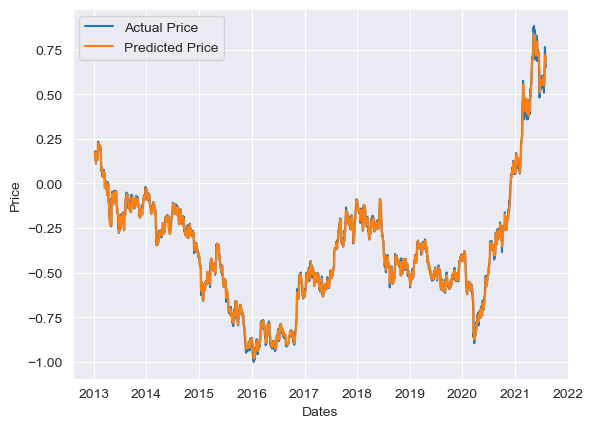

In [54]:
with torch.no_grad():
    predicted = model(X_train[:].to(device)).to('cpu').numpy()

plt.plot(train_dates, y_train, label='Actual Price')
plt.plot(train_dates, predicted, label='Predicted Price')

plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend()
plt.show()


In [55]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], LOOKBACK+1))
dummies[:, 0] = train_predictions
dummies = price_scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([3.67089762, 3.69790011, 3.66909949, ..., 4.49624483, 4.50138188,
       4.48209717])

In [56]:
dummies = np.zeros((X_train.shape[0], LOOKBACK+1))
dummies[:, 0] = y_train.flatten()
dummies = price_scaler.inverse_transform(dummies)
new_y_train = dc(dummies[:, 0])
new_y_train

array([3.70900001, 3.65399999, 3.63900001, ..., 4.50749998, 4.46550002,
       4.41800004])

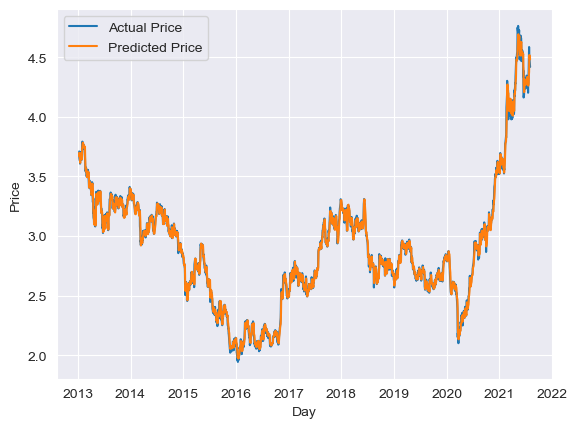

In [57]:
plt.plot(train_dates,new_y_train,  label='Actual Price')
plt.plot(train_dates,train_predictions, label='Predicted Price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], LOOKBACK+1))
dummies[:, 0] = test_predictions
dummies = price_scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([4.4486359 , 4.41141456, 4.36489367, 4.35414605, 4.35340662,
       4.31894153, 4.34306704, 4.36097531, 4.36169957, 4.38037351,
       4.35169442, 4.2682694 , 4.18168338, 4.09889723, 4.12594398,
       4.19959031, 4.24932724, 4.27164258, 4.26839932, 4.30980725,
       4.35441115, 4.37078166, 4.32038266, 4.31544031, 4.33349411,
       4.3103767 , 4.27191544, 4.2883551 , 4.39088155, 4.38277366,
       4.35117806, 4.38774233, 4.33135808, 4.2870472 , 4.18767996,
       4.1570963 , 4.22816545, 4.24304835, 4.27795967, 4.29488268,
       4.27539801, 4.23747016, 4.15276855, 4.18461479, 4.23095383,
       4.21890981, 4.18375553, 4.23024643, 4.26895128, 4.33682705,
       4.33836257, 4.44337965, 4.54260332, 4.62709042, 4.65945883,
       4.66380888, 4.680784  , 4.6058013 , 4.54361659, 4.53409452,
       4.50758448, 4.44322261, 4.43849691, 4.39779834, 4.39321415,
       4.37588944, 4.3436977 , 4.33104042, 4.34237677, 4.38055857,
       4.38288011, 4.35429034, 4.38632413, 4.42686602, 4.41669

In [59]:
dummies = np.zeros((X_test.shape[0], LOOKBACK+1))
dummies[:, 0] = y_test.flatten()
dummies = price_scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test
squared_differences = (new_y_test - test_predictions)**2

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(squared_differences))
#rmse
absolute_differences = np.abs(new_y_test - test_predictions)

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(absolute_differences)
rmse

0.06960613804973333

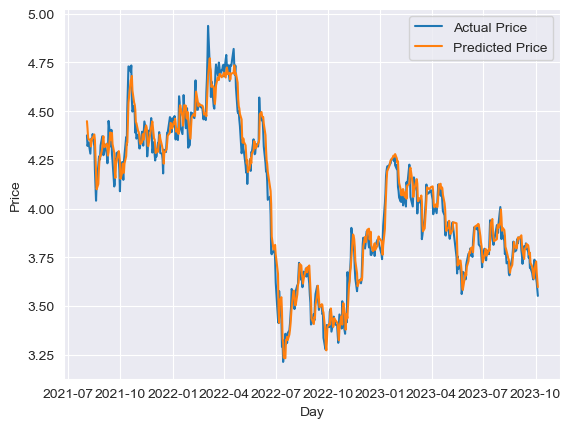

In [60]:
plt.plot(test_dates, new_y_test, label='Actual Price')
plt.plot(test_dates,test_predictions, label='Predicted Price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [61]:
test_dates

2160   2021-08-03
2161   2021-08-04
2162   2021-08-05
2163   2021-08-06
2164   2021-08-09
          ...    
2695   2023-09-29
2696   2023-10-02
2697   2023-10-03
2698   2023-10-04
2699   2023-10-05
Name: Date, Length: 540, dtype: datetime64[ns]

In [70]:
# Specify the file path where you want to save the trained model
model_file_path = '\Forecasting Copper Prices'

# Save the trained model to the specified file
torch.save(model, model_file_path)

In [62]:
# # Normalize the data
# scaler = MinMaxScaler()
# scaled_target = scaler.fit_transform(df['Price'].values.reshape(-1, 1))
# scaled_features = scaler.fit_transform(df.drop(columns=['Price']))

In [ ]:
# # Prepare sequences
# seq_length = 30
# X, y = [], []
# for i in range(len(df) - seq_length):
#     X.append(scaled_features[i:i + seq_length])
#     y.append(scaled_target[i + seq_length])

# X = np.array(X)
# y = np.array(y)

## Model

### Artificial Neural Network (ANN)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
# Split data into features (X) and target (y)
X = data_scaled[:, 1:]  # Exclude the first column if it's the target variable
y = data_scaled[:, 0]  # First column as the target variable

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Adjust activation function for regression

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
# Make forecasts
y_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
time_index = range(len(y_test))

# Plot actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, y_test, label="Actual", linestyle='-', linewidth=2)
plt.plot(time_index, y_pred, label="Forecasted", linestyle='-', linewidth=2)

plt.title("Copper Price Forecasting")
plt.xlabel("Time")
plt.ylabel("Copper Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save("models/ANN.h5")
print("Saved model to disk")

### Vector Autoregressor (VAR)

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

NameError: name 'plt' is not defined

In [ ]:
# Check the shape of the DataFrame
print("Original DataFrame Shape:", df.shape)

In [ ]:
# If 'df' is not 2D, convert it to a 2D NumPy array
if len(df.shape) > 2:
    df_2d = df.values  # Convert 'df' to a 2D NumPy array
    print("Converted DataFrame to 2D NumPy Array Shape:", df_2d.shape)
else:
    df_2d = df  # 'df' is already 2D

In [ ]:
data = df.values

In [ ]:
# Split your data into a training set and a test set
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

In [ ]:
model = VAR(data)  # 'data' is your 2D array of time series data
best_lag_order = model.select_order(15)  # Choose a maximum lag order
print("Selected Lag Order:", best_lag_order.selected_orders)

In [ ]:
# Fit the VAR model
model = VAR(train)
model_fitted = model.fit(10)

In [ ]:
# Forecast
forecast = model_fitted.forecast(train[-model_fitted.k_ar:], steps=len(test))

In [ ]:
forecast

In [ ]:
# Calculate RMSE
# rmse_value = rmse(test, forecast)
# print(f"Root Mean Squared Error (RMSE): {rmse_value}")

In [ ]:
# Plot the actual and forecasted copper prices
plt.plot(test[:, 0], label="Actual")
plt.plot(forecast[:, 0], label="Forecasted")
plt.title("Copper Price Forecast")
plt.legend()
plt.show()

### LSTM - CNN

In [ ]:
# Build the LSTM-CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(df.columns.drop('Price')))))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Forecasted")
plt.title("Actual vs. Forecasted Copper Prices")
plt.xlabel("Time")
plt.ylabel("Copper Price")
plt.legend()
plt.show()